# Simple and Multiple Linear Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
%matplotlib inline

## Load the data
Lets load the data using the url. The data is the CO2 emission and fule consumption of cars

In [2]:

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv"

# Read CSV from URL
df = pd.read_csv(url)
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


## Understand the data

### `FuelConsumption.csv`:
You will use a fuel consumption dataset, **`FuelConsumption.csv`**, which contains model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada. [Dataset source](http://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64).

- **MODEL YEAR** e.g. 2014
- **MAKE** e.g. VOLVO
- **MODEL** e.g. S60 AWD
- **VEHICLE CLASS** e.g. COMPACT
- **ENGINE SIZE** e.g. 3.0
- **CYLINDERS** e.g 6
- **TRANSMISSION** e.g. AS6
- **FUEL TYPE** e.g. Z
- **FUEL CONSUMPTION in CITY(L/100 km)** e.g. 13.2
- **FUEL CONSUMPTION in HWY (L/100 km)** e.g. 9.5
- **FUEL CONSUMPTION COMBINED (L/100 km)** e.g. 11.5
- **FUEL CONSUMPTION COMBINED MPG (MPG)** e.g. 25
- **CO2 EMISSIONS (g/km)** e.g. 182 

Your task will be to create a simple linear regression model from one of these features to predict CO2 emissions of unobserved cars based on that feature. 

## Explore the data

In [3]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


### Select features
Select a few features that might be indicative of CO2 emission to explore more.


In [31]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.sample(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
328,2.4,4,11.1,255
620,3.5,6,12.0,276
696,2.5,4,8.6,198
231,3.6,6,14.3,229
513,2.0,4,9.6,221
297,3.6,6,11.2,258
108,4.4,8,12.7,292
640,5.0,8,15.4,354
1055,3.0,6,10.4,281


### Visualize features
Consider the histograms for each of these features.

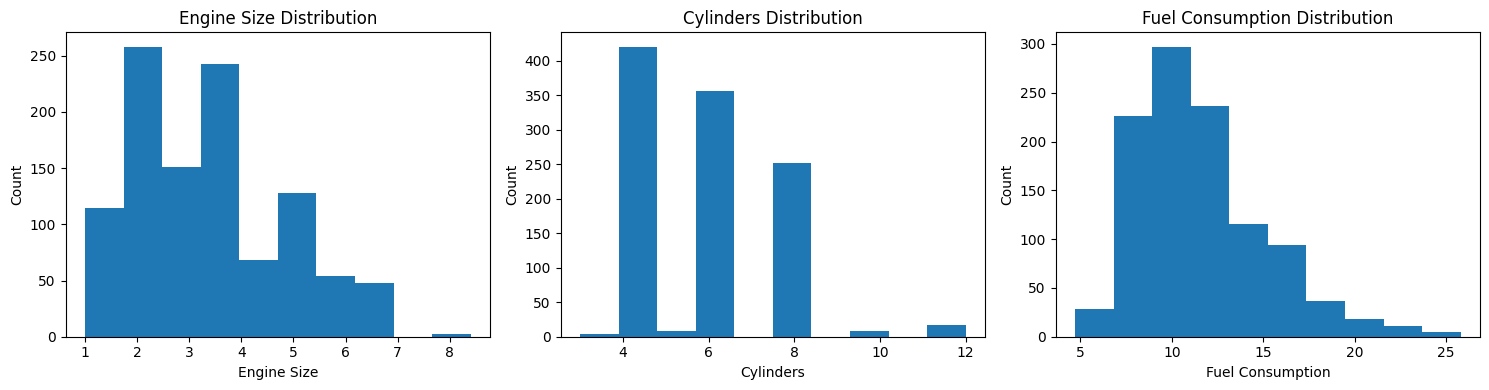

In [ ]:
cols = ['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB']
titles = ['Engine Size Distribution', 'Cylinders Distribution', 'Fuel Consumption Distribution']
x_labels = ['Engine Size', 'Cylinders', 'Fuel Consumption']
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

for i in range(3):
    axes[i].hist(cdf[cols[i]])
    axes[i].set_title(titles[i])
    axes[i].set_xlabel(x_labels[i])
    axes[i].set_ylabel('Count')
plt.tight_layout()
plt.show()

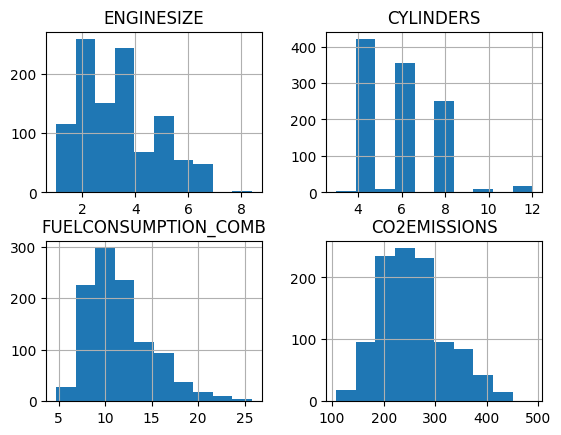

In [46]:
# Or simply:
cdf.hist()
plt.show()

As you can see, most engines have 4, 6, or 8 cylinders, and engine sizes between 2 and 4 liters.
As you might expect, combined fuel consumption and CO2 emission have very similar distributions.
Go ahead and display some scatter plots of these features against the CO2 emissions, to see how linear their relationships are.

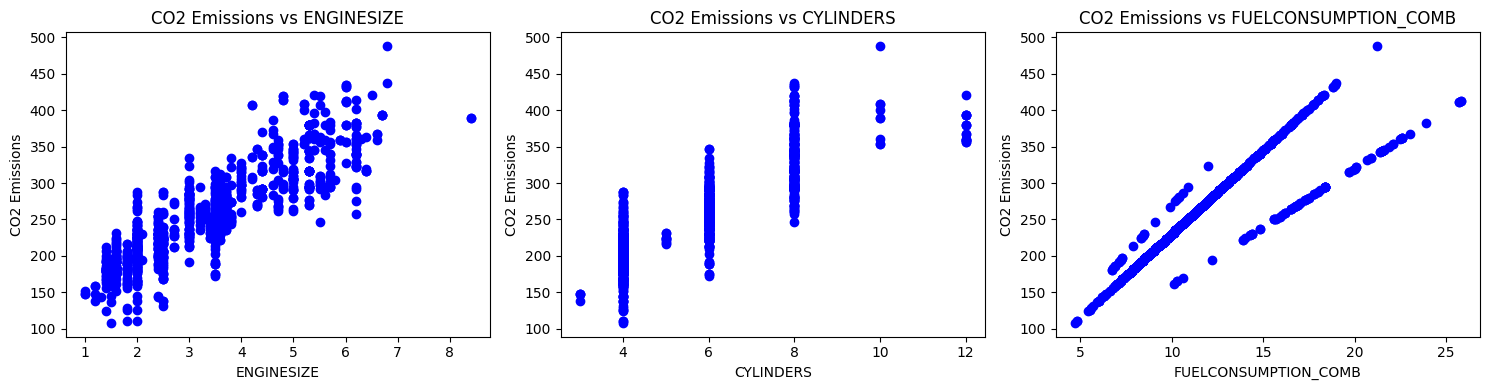

In [51]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
for i in range(3):
    axes[i].scatter(cdf[cols[i]], cdf['CO2EMISSIONS'], color='blue')
    axes[i].set_title(f'CO2 Emissions vs {cols[i]}')
    axes[i].set_xlabel(cols[i])
    axes[i].set_ylabel('CO2 Emissions')
plt.tight_layout()
plt.show()


### Extract the input feature and labels from the dataset
Although perhaps not necessarily the ideal choice of input feature, for illustration purposes, you will use engine size to predict CO2 emission with a linear regression model.  
You can begin the process by extracting the input feature and target output variables, X and y, from the dataset.


In [55]:
X = cdf['ENGINESIZE'].to_numpy()
y = cdf['CO2EMISSIONS'].to_numpy()

#### Create train and test datasets

In [63]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X.shape, X_train.shape, X_test.shape, y.shape, y_train.shape, y_test.shape)

(1067,) (853,) (214,) (1067,) (853,) (214,)


In [69]:
import sklearn.linear_model

regressor = sklearn.linear_model.LinearRegression()
regressor.fit(X_train.reshape(-1, 1), y_train)

# Print the coefficients
print ('Coefficients: ', regressor.coef_[0]) # with simple linear regression there is only one coefficient, here we extract it from the 1 by 1 array.
print ('Intercept: ',regressor.intercept_)

Coefficients:  38.99297872443395
Intercept:  126.28970217408764


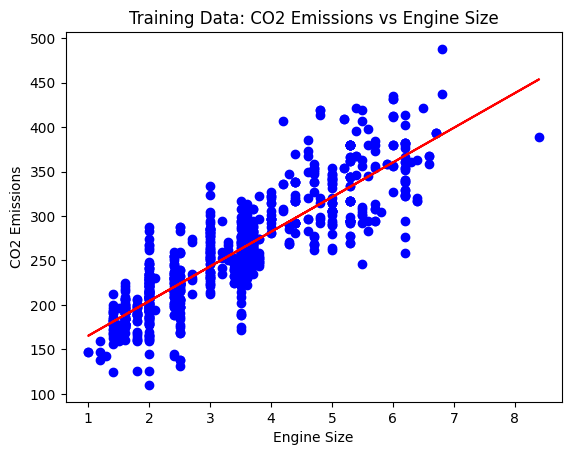

In [86]:
plt.scatter(X_train, y_train, color= 'blue')
plt.plot(X_train, [regressor.coef_[0]   * i + regressor.intercept_ for i in X_train], color='red')
plt.xlabel("Engine Size")
plt.ylabel("CO2 Emissions")
plt.title("Training Data: CO2 Emissions vs Engine Size")
plt.show()

### Model Evaluation

In [85]:
y_predict = regressor.predict(X_test.reshape(-1, 1))

print("Mean absolute error:", np.sum(abs(y_predict - y_test)) / y_test.shape[0])
print("Mean squared error:", np.sum((y_predict - y_test) ** 2) / y_test.shape[0])


Mean absolute error: 24.097257411707844
Mean squared error: 985.9381692275001


#### 1. Plot the regression model result over the test data instead of the training data. Visually evaluate whether the result is good.


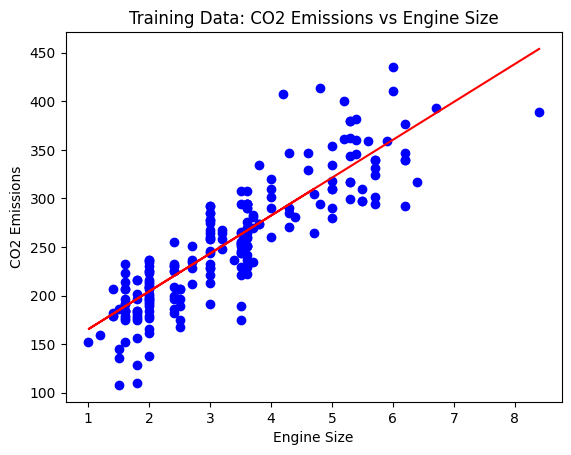

In [88]:
plt.scatter(X_test, y_test, color= 'blue')
plt.plot(X_test, [regressor.coef_[0]   * i + regressor.intercept_ for i in X_test], color='red')
plt.xlabel("Engine Size")
plt.ylabel("CO2 Emissions")
plt.title("Training Data: CO2 Emissions vs Engine Size")
plt.show()

#### 2. Select the fuel consumption feature from the dataframe and split the data 80%/20% into training and testing sets. 


In [92]:
X = cdf['FUELCONSUMPTION_COMB'].to_numpy()
y = cdf['CO2EMISSIONS'].to_numpy()

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.2)

Coefficients:  16.358994080162347
Intercept:  67.21885999613485
Mean absolute error: 21.130472121701818
Mean squared error: 893.3232117657524


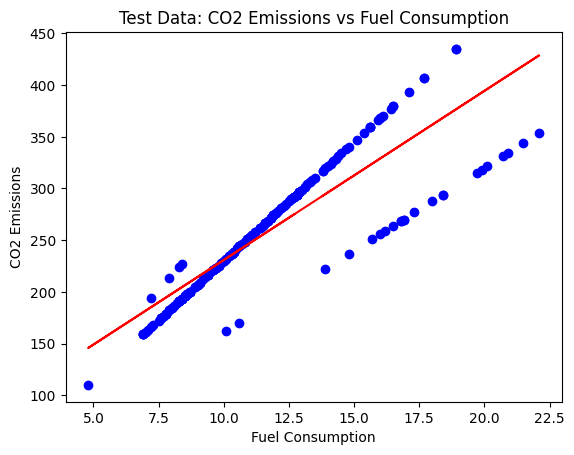

In [93]:
regressor = sklearn.linear_model.LinearRegression()
regressor.fit(X_train.reshape(-1, 1), y_train)
print ('Coefficients: ', regressor.coef_[0])
print ('Intercept: ',regressor.intercept_)
y_predict = regressor.predict(X_test.reshape(-1, 1))
print("Mean absolute error:", np.sum(abs(y_predict - y_test)) / y_test.shape[0])
print("Mean squared error:", np.sum((y_predict - y_test) ** 2) / y_test.shape[0])
plt.scatter(X_test, y_test, color= 'blue')
plt.plot(X_test, [regressor.coef_[0]   * i + regressor.intercept_ for i in X_test], color='red')
plt.xlabel("Fuel Consumption")
plt.ylabel("CO2 Emissions")
plt.title("Test Data: CO2 Emissions vs Fuel Consumption")
plt.show()

In [112]:
students = pd.read_csv("/Users/fahimeh/Downloads/Students_all_centers_correct_all.csv")
grp = pd.crosstab(students["Center Name"], students["Gender"]).reset_index()
grp['total'] = grp['Boy'] + grp['Girl']
grp.to_csv("/Users/fahimeh/Downloads/Students_all_centers_genders.csv")

In [97]:
students.columns

Index(['Name', 'Age', 'Center Name', 'Date ', 'Delayed?',
       'Did the student get Mehr Package?', 'Estimated_age', 'Gender',
       'Health Issues?', 'Height (cm)', 'Last 4 digits of ID', 'Last Name',
       'Latest degree', 'Level of support', 'Note About Health issues',
       'Note about the delay', 'Number', 'Others', 'Persian DOB',
       'Program subject for Bachlors', 'Reason of support',
       'School Subject for Upper middle schoolers', 'School Year',
       'Subject for Master students', 'Weight (kg)',
       'gregorian_date_of_birth'],
      dtype='object')

# Multiple Linear Regression

In [ ]:
#Dropping unnecessary columns
df = df.drop(['MODELYEAR', 'MAKE', 'MODEL', 'VEHICLECLASS', 'TRANSMISSION', 'FUELTYPE',],axis=1)
df.head(3)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,33,196
1,2.4,4,11.2,7.7,9.6,29,221
2,1.5,4,6.0,5.8,5.9,48,136


In [7]:
#We want to check how corrolated are differnt features
df.corr()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
ENGINESIZE,1.000000,0.934011,0.832225,0.778746,0.819482,-0.808554,0.874154
CYLINDERS,0.934011,1.000000,0.796473,0.724594,0.776788,-0.770430,0.849685
FUELCONSUMPTION_CITY,0.832225,0.796473,1.000000,0.965718,0.995542,-0.935613,0.898039
FUELCONSUMPTION_HWY,0.778746,0.724594,0.965718,1.000000,0.985804,-0.893809,0.861748
FUELCONSUMPTION_COMB,0.819482,0.776788,0.995542,0.985804,1.000000,-0.927965,0.892129
FUELCONSUMPTION_COMB_MPG,-0.808554,-0.770430,-0.935613,-0.893809,-0.927965,1.000000,-0.906394
CO2EMISSIONS,0.874154,0.849685,0.898039,0.861748,0.892129,-0.906394,1.000000


Look at the bottom row, which shows the correlation between each variable and the target, 'CO2EMISSIONS'. Each of these shows a fairly high level of correlation, each exceeding 85% in magnitude. Thus all of these features are good candidates. 

Next, examine the correlations of the distinct pairs. 'ENGINESIZE' and 'CYLINDERS' are highly correlated, but 'ENGINESIZE' is more correlated with the target, so we can drop 'CYLINDERS'. 

Similarly, each of the four fuel economy variables is highly correlated with each other. Since FUELCONSUMPTION_COMB_MPG is the most correlated with the target, you can drop the others: 'FUELCONSUMPTION_CITY,' 'FUELCONSUMPTION_HWY,' 'FUELCONSUMPTION_COMB.' 

In [8]:
df = df.drop(['CYLINDERS', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB',],axis=1)
df.head()

,ENGINESIZE,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2.0,33,196
1,2.4,29,221
2,1.5,48,136
3,3.5,25,255
4,3.5,27,244


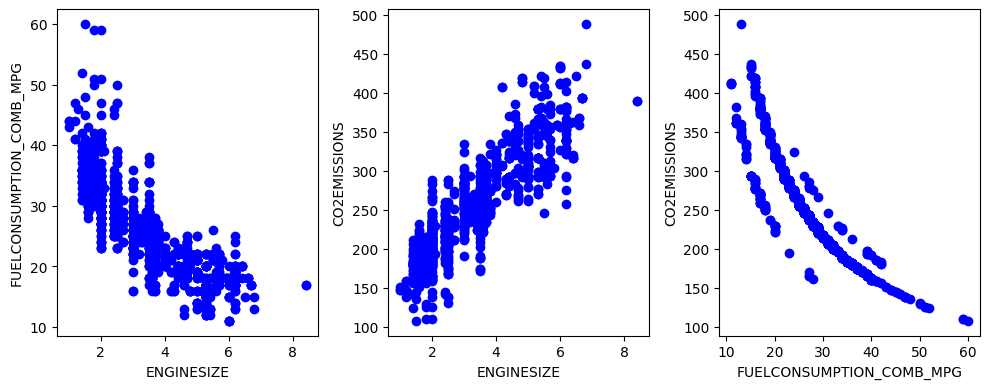

In [16]:
import itertools

fig, axes = plt.subplots(1, 3, figsize=(10, 4))
vars = ['ENGINESIZE', 'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS']

for i, pairs in enumerate(itertools.combinations(vars, 2)):
    axes[i].scatter(df[pairs[0]], df[pairs[1]], color='blue')
    axes[i].set_xlabel(pairs[0])     
    axes[i].set_ylabel(pairs[1])
plt.tight_layout()
plt.show()


As you can see, the relationship between 'FUELCONSUMPTION_COMB_MPG' and 'CO2EMISSIONS' is non-linear. In addition, you can clearly see three different curves. This suggests exploring the categorical variables to see if they are able to explain these differences. Let's leave this as an exercise for you to explore deeper. Regarding the non-linearity, you will handle this in the next lab. For now, let's just consider through modeling whether fuel economy explains some of the variances in the target as is.

In [20]:
X = df[['ENGINESIZE', 'FUELCONSUMPTION_COMB_MPG']].to_numpy()
y = df['CO2EMISSIONS'].to_numpy()

# Scaling data
So far we did not care much becasue we were dealing with only one var. However when we have multiple var, we need to scale the features to make sure that the model is not favoring one var because of the higher or lower values. Here we can use the z-scoring or standardizing the data

[ 1.33185143e-17 -1.33185143e-17]
[1. 1.]


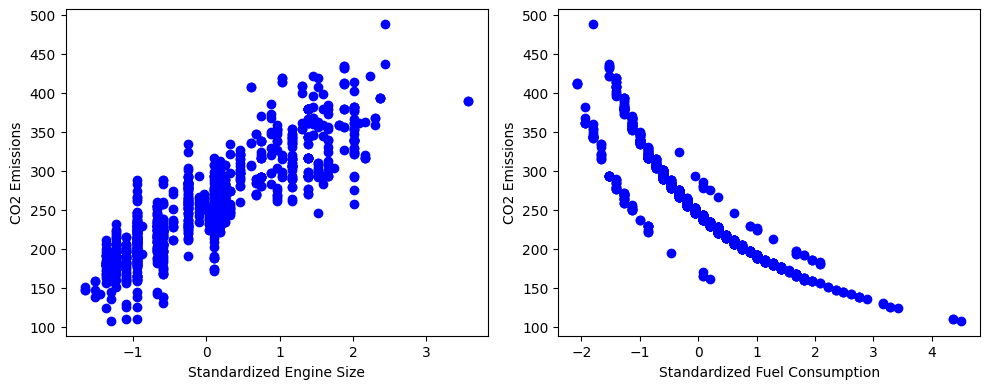

In [29]:
from sklearn import preprocessing

X = preprocessing.StandardScaler().fit(X).transform(X)

#Just checking the standardization worked
print(X.mean(axis=0))
print(X.std(axis=0))
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
axes[0].scatter(X[:,0], y, color='blue')
axes[0].set_xlabel('Standardized Engine Size')
axes[0].set_ylabel('CO2 Emissions')     
axes[1].scatter(X[:,1], y, color='blue')
axes[1].set_xlabel('Standardized Fuel Consumption')
axes[1].set_ylabel('CO2 Emissions')
plt.tight_layout()
plt.show()

In [34]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
regressor = sklearn.linear_model.LinearRegression()
regressor.fit(X_train, y_train)
print ('Coefficients: ', regressor.coef_)
print ('Intercept: ',regressor.intercept_)
y_predict = regressor.predict(X_test)
print("Mean absolute error:", np.sum(abs(y_predict - y_test)) / y_test.shape[0])
print("Mean squared error:", np.sum((y_predict - y_test) ** 2) / y_test.shape[0])


Coefficients:  [ 25.27339614 -37.4381472 ]
Intercept:  256.2907248808642
Mean absolute error: 14.285849104574131
Mean squared error: 466.1131199661164


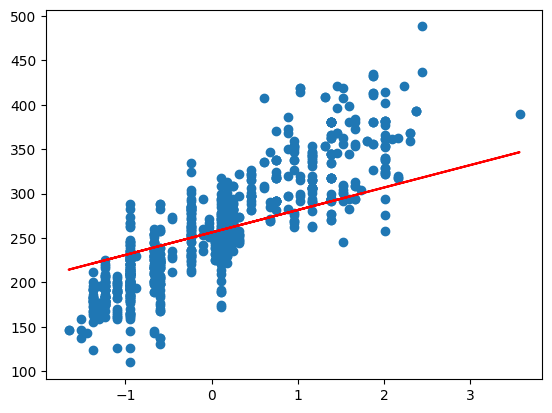

In [41]:
plt.scatter(X_train[:,0], y_train)
plt.plot(X_train[:,0], X_train[:,0] * regressor.coef_[0] + regressor.intercept_, color='red')

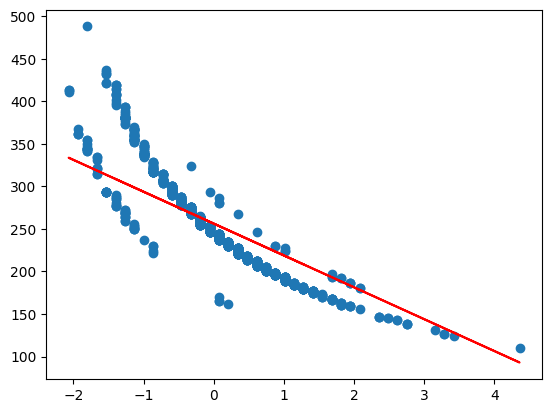

In [42]:
plt.scatter(X_train[:,1], y_train)
plt.plot(X_train[:,1], X_train[:,1] * regressor.coef_[1] + regressor.intercept_, color='red')